<a href="https://colab.research.google.com/github/chetanpatil4160/Machine-Learning-Mobile-Price-Range-Predicition/blob/main/Mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement:**
**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**
### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 
* 0(low cost), 
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).
* Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

## **Importing Dependancies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   

## **MOUNT THE DATASET**

In [ ]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **READ THE DATASET**

In [ ]:
#READ CSV FILE
df=pd.read_csv('/content/drive/MyDrive/machine learing/Rajesh mobile price range classification /data_mobile_price_range.csv') 
df.head()  #FIRST FIVE ROWS

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

 **We have 2000 samples and 21 Features.**

**The last Feature is Target Feature which means we have label dataset**.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Most of the values are in integer and some in float format**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**Some Basic Observations:**

**We can see that sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.**

In [ ]:
# Checking How many observations having screen width value as 0.
print(df[df['sc_w']==0].shape[0])

179


In [ ]:
# Checking How many observations having px_hieght value as 0.
print(df[df['px_height']==0].shape[0])

0


In [ ]:
# As there are only 2 observations having px_height=0. so we will drop it.
df=df[df['px_height']!=0]

In [ ]:
# Checking Duplicate values in data set.
print(f' We have {df.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**There are no null values. So now We can check the datatype**

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

**Seems Like there are no Categorical Feature. All value are numeric dataset. So We can do further process.**

# **Data Visulization & Analysis**

In [ ]:
print("Bluetooth\n",df.blue.value_counts())
print("Dual sim\n",df.dual_sim.value_counts())
print("4G\n",df.four_g.value_counts())
print("Number of Cores\n",df.n_cores.value_counts())
print("3G\n",df.three_g.value_counts())
print("Touch Screen\n",df.touch_screen.value_counts())
print("Wifi\n",df.wifi.value_counts())

Bluetooth
 0    1009
1     989
Name: blue, dtype: int64
Dual sim
 1    1019
0     979
Name: dual_sim, dtype: int64
4G
 1    1041
0     957
Name: four_g, dtype: int64
Number of Cores
 4    273
7    259
8    255
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64
3G
 1    1521
0     477
Name: three_g, dtype: int64
Touch Screen
 1    1004
0     994
Name: touch_screen, dtype: int64
Wifi
 1    1014
0     984
Name: wifi, dtype: int64


**As we can see our dataset is perfectly balanced**

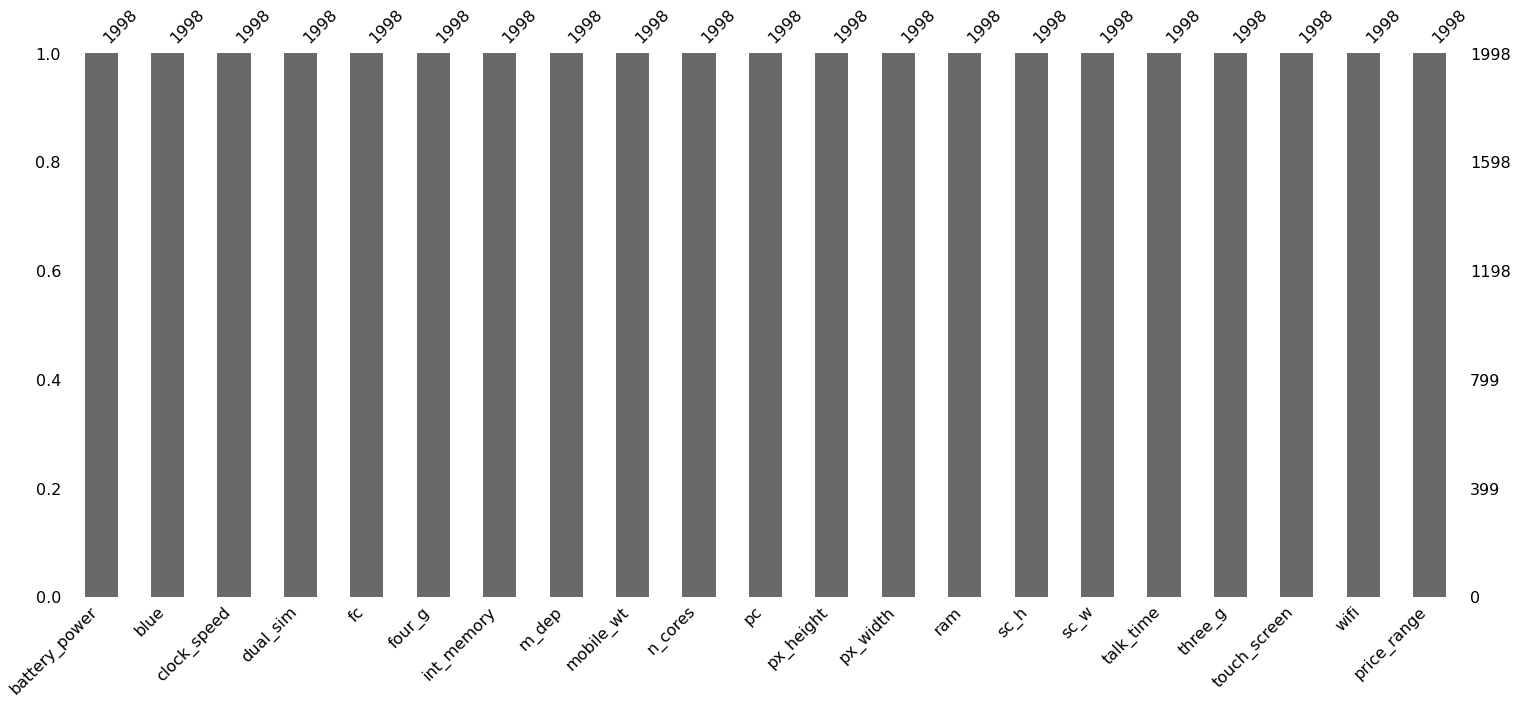

In [ ]:
#visualise missing values in our dataset
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df)
plt.show()

**There are no missing values in our dataset**

In [ ]:
# lets have look at our target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

2    500
0    500
1    499
3    499
Name: price_range, dtype: int64

**As we can see our dataset is perfectly balanced**

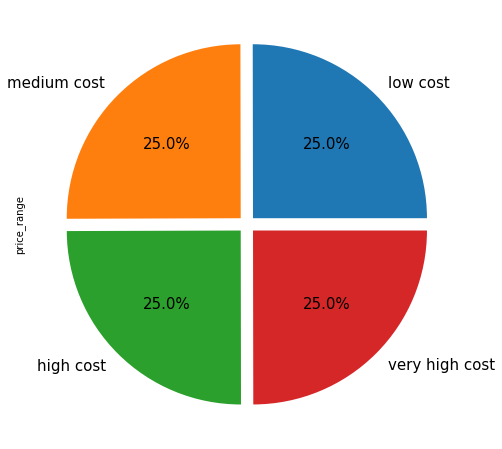

In [ ]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart


***Wow.!  we have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.Accuracy score will be the best evalaution metric for us to select the model.***

***This is the target variable with value of***
* ***0=low cost,***
* ***1=medium cost,***
* ***2=high cost,***
* ***3=very high cost.***

* **We can see that our target varibale is equally distributed.** 
* **Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.**

# **RAM EFFECT ON PRICE**

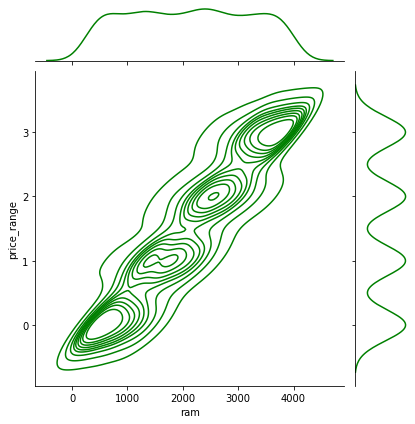

In [ ]:
sns.jointplot(x = 'ram', y = 'price_range', data = df, kind = 'kde', color = 'green')

 **As Ram size increases price also increase in mobile**

## **binary categorical variables**

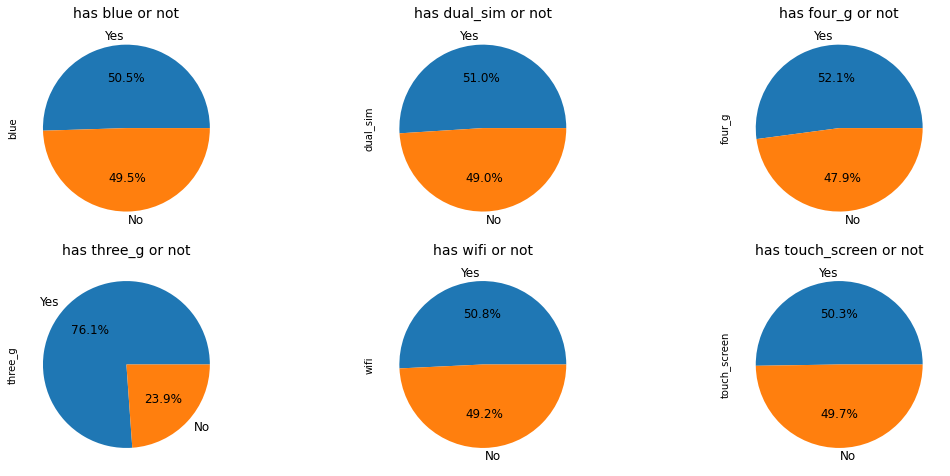

In [ ]:
# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  df[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

* ***1 means it has the specifications.***
* ***0 means it do not have the specifications.***
* ***Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.***
* ***very few mobiles(23.8%) do not have Three_g.***


## **price_range vs other fearures**

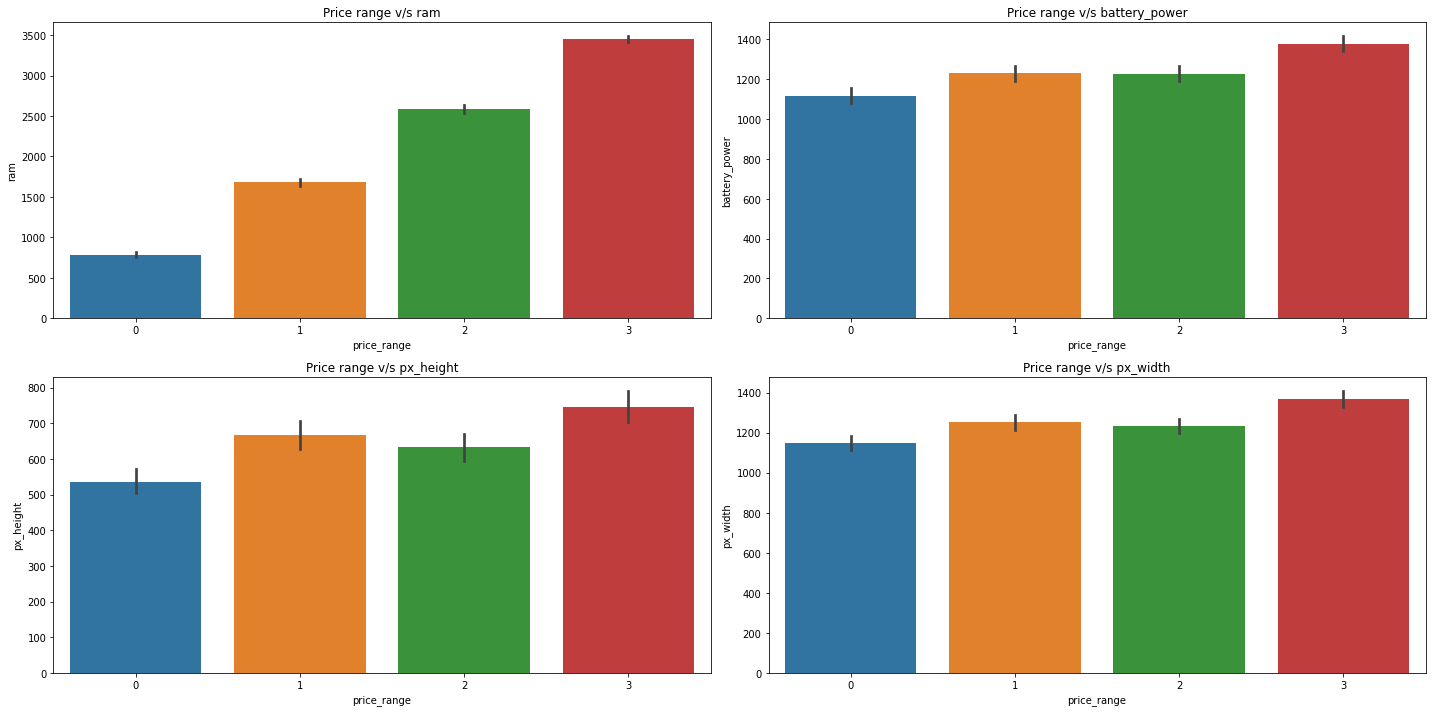

In [ ]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df['price_range'],y=df[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()




### **Observations:**
* ***Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.***
* ***Mobiles having RAM less than 1000 MB falls under low cost category.***
* ***Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.***
* ***Mobiles with more than 700 pixel height and width more than 1300 has very high cost.***

## **Box plot price vs other_features**

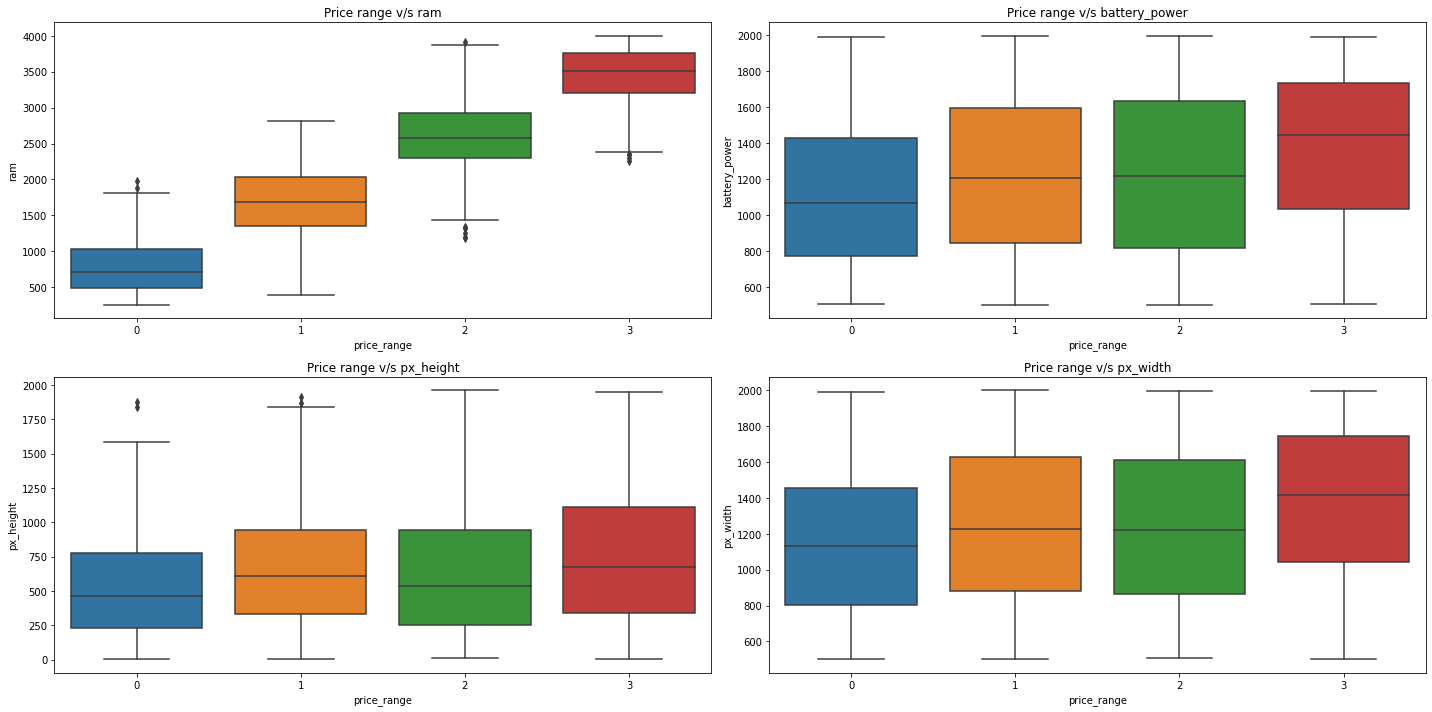

In [ ]:
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']
for var in variables:
  plt.subplot(rows,cols,counter)
  sns.boxplot(x=df['price_range'],y=df[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

In [ ]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.012329,0.011238,-0.041599,0.032821,0.015404,-0.004951,0.035201,0.002788,-0.029017,...,0.015347,-0.009801,-0.001694,-0.030591,-0.020614,0.051655,0.011369,-0.010815,-0.008059,0.199861
blue,0.012329,1.000000,0.021489,0.035244,0.004055,0.013446,0.042283,0.003191,-0.009386,0.035318,...,-0.006869,-0.040443,0.027172,-0.002237,0.000047,0.014769,-0.030262,0.010061,-0.021875,0.021484
clock_speed,0.011238,0.021489,1.000000,-0.000656,-0.000565,-0.043723,0.006882,-0.013981,0.012656,-0.006094,...,-0.013599,-0.009914,0.002978,-0.028784,-0.006862,-0.011547,-0.046813,0.019126,-0.023832,-0.006955
dual_sim,-0.041599,0.035244,-0.000656,1.000000,-0.028979,0.004168,-0.016321,-0.022702,-0.009384,-0.024025,...,-0.022394,0.014875,0.041775,-0.012519,-0.017448,-0.039347,-0.013446,-0.016120,0.021728,0.017919
fc,0.032821,0.004055,-0.000565,-0.028979,1.000000,-0.016722,-0.029544,-0.001309,0.024050,-0.013066,...,-0.009770,-0.005799,0.014637,-0.011261,-0.011995,-0.007226,0.001704,-0.014995,0.020259,0.021528
four_g,0.015404,0.013446,-0.043723,0.004168,-0.016722,1.000000,0.009285,-0.001320,-0.016178,-0.030358,...,-0.017869,0.006927,0.006700,0.027714,0.037758,-0.046751,0.584069,0.015820,-0.016664,0.014357
int_memory,-0.004951,0.042283,0.006882,-0.016321,-0.029544,0.009285,1.000000,0.007482,-0.033675,-0.027036,...,0.009572,-0.009215,0.032411,0.036733,0.011889,-0.003602,-0.009033,-0.026425,0.006383,0.043825
m_dep,0.035201,0.003191,-0.013981,-0.022702,-0.001309,-0.001320,0.007482,1.000000,0.020896,-0.003926,...,0.024535,0.024887,-0.008409,-0.025042,-0.019300,0.017779,-0.011778,-0.002116,-0.028917,0.001866
mobile_wt,0.002788,-0.009386,0.012656,-0.009384,0.024050,-0.016178,-0.033675,0.020896,1.000000,-0.019435,...,0.000374,0.001199,-0.001710,-0.033540,-0.021516,0.006888,0.001769,-0.013994,-0.000804,-0.029459
n_cores,-0.029017,0.035318,-0.006094,-0.024025,-0.013066,-0.030358,-0.027036,-0.003926,-0.019435,1.000000,...,-0.005940,0.025162,0.005155,0.000663,0.025837,0.013823,-0.015106,0.023156,-0.009317,0.004897


Ram has the strongest positive correalation with price range

# **Mobiles with both 3G and 4G.**

In [ ]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=df[(df['three_g']==1) & (df['four_g']==1)]

In [ ]:
three_g_and_4g_df['price_range'].value_counts()

3    274
1    261
0    259
2    247
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


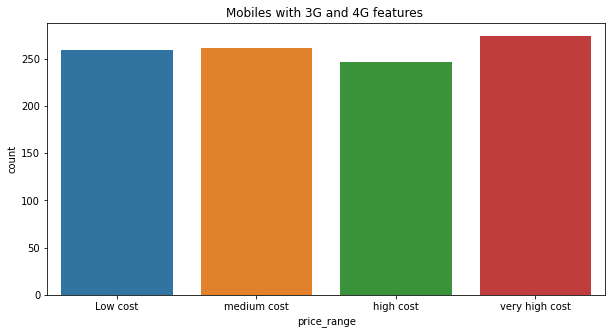

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

* **As we can see from low cost to very high cost mobiles have both features.**

# **Mobiles not having no 3G and 4G.**

In [ ]:
No_3g_4G_df=df[(df['three_g']!=1) & (df['four_g']!=1)]

In [ ]:
No_3g_4G_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
19,682,1,0.5,0,4,0,19,1.0,121,4,...,902,1064,2337,11,1,18,0,1,1,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
30,1579,1,0.5,1,0,0,5,0.2,88,7,...,1358,1739,3532,17,11,12,0,0,1,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


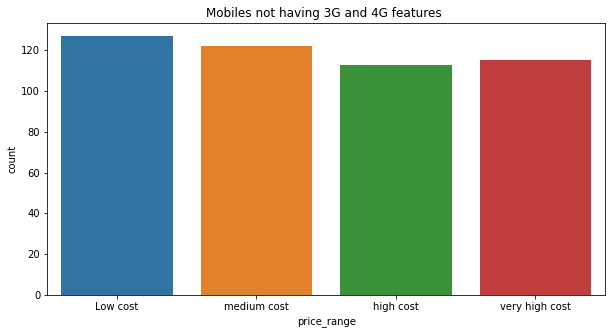

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(No_3g_4G_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles not having 3G and 4G features ")
plt.show()

* **Its very obvious that low cost mobiles will not have 3G and 4G.**
* **Mobiles with very high cost may have 5G. As we know technologies are changes everytime.**

# **n_cores v/s price range**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


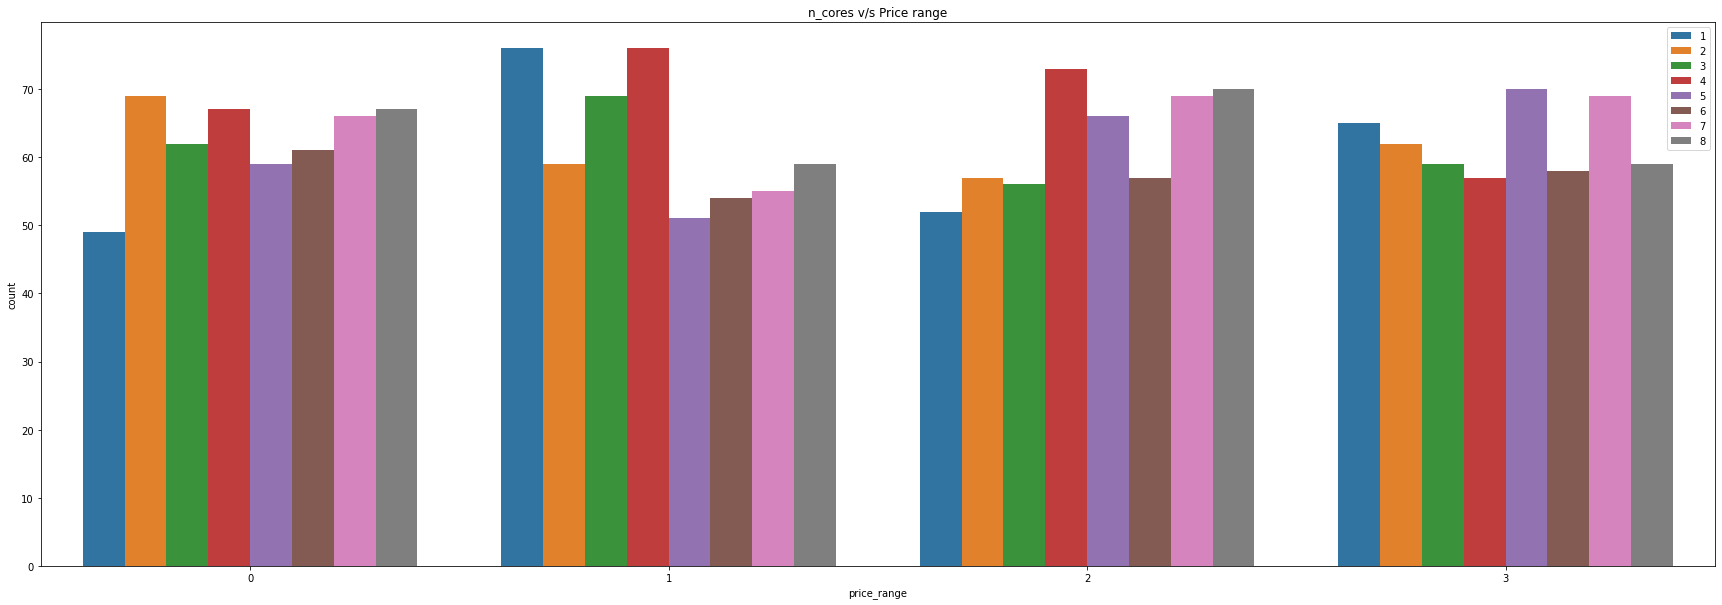

In [ ]:
# n_cores v/s price range
plt.figure(figsize=(30,10))
sns.countplot(df['price_range'],hue=df['n_cores'])
plt.title("n_cores v/s Price range")
plt.legend(loc='best')


**Observations:**
* **Price range 0 has majority of phones with 2 core processors**
* **Price range 1 has majority of phones with 1 and 4 core processors**
* **Price range 2 has majority of phones with 4 core processors**
* **Price range 3 has majority of phones with 5 and 7 core processors**

# **Mobile with 4G Features**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


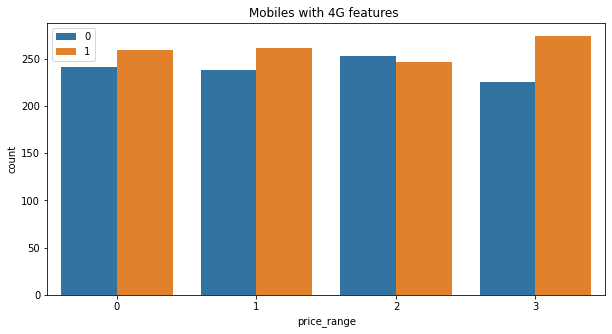

In [ ]:

plt.figure(figsize=(10, 5))
sns.countplot(df['price_range'],hue=df['four_g'])
plt.title("Mobiles with 4G features ")
plt.legend(loc='best')

**Majority of phones of only price range 2 dont have 4G service.**

# **Mobiles with bluetooth features**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


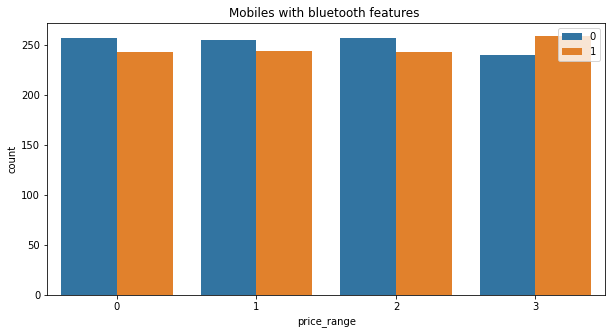

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df['price_range'],hue=df['blue'])
plt.title("Mobiles with bluetooth features ")
plt.legend(loc='best')


**Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.**

#**Let's Check which numerical feature is driving the price range most.**

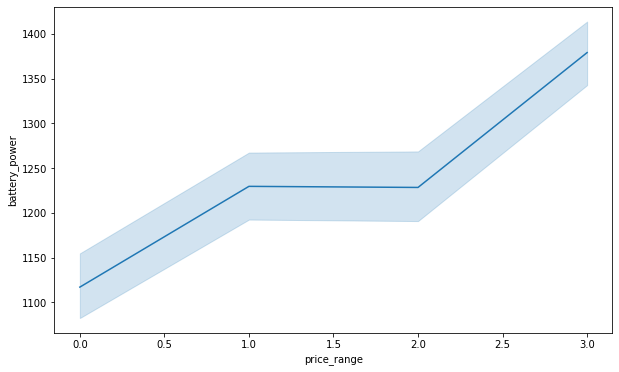

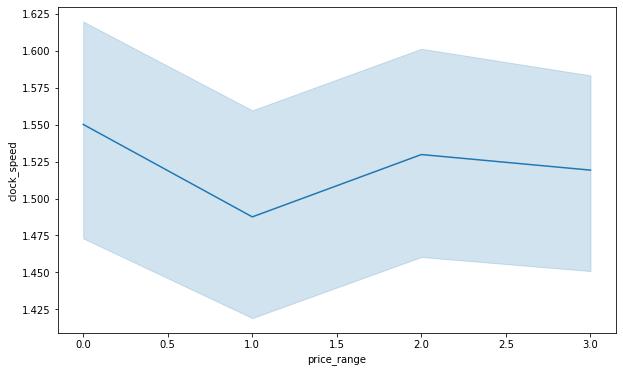

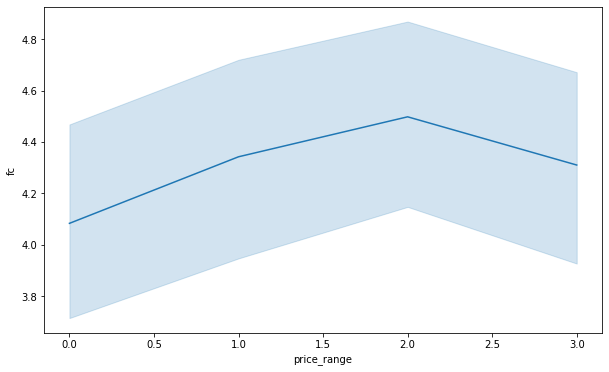

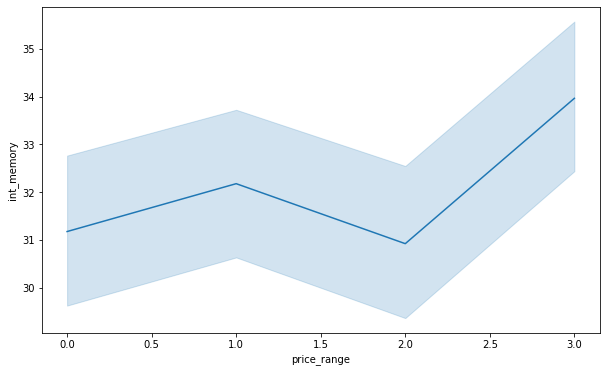

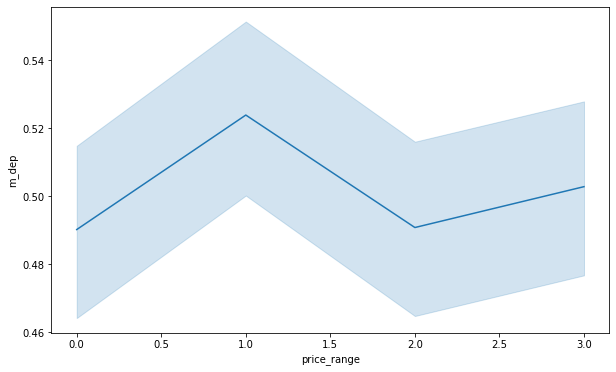

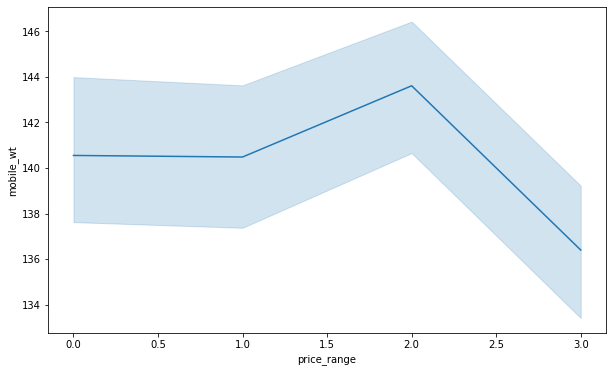

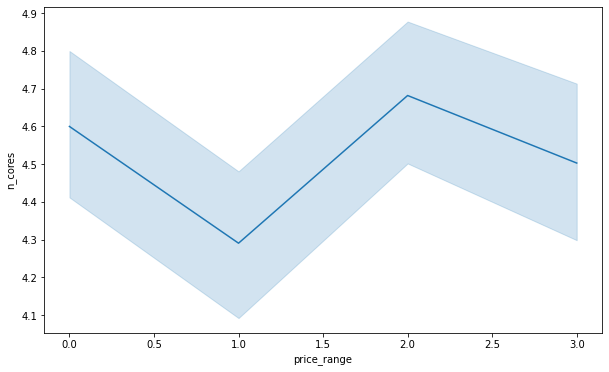

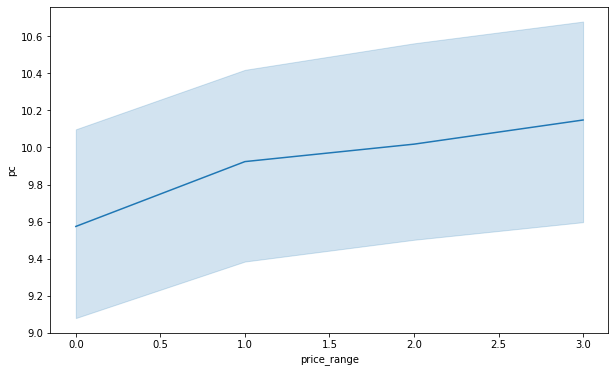

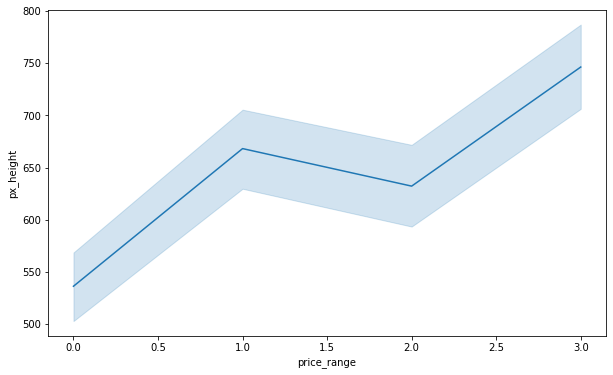

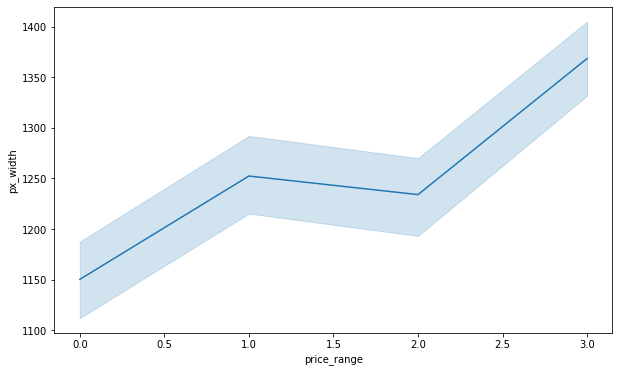

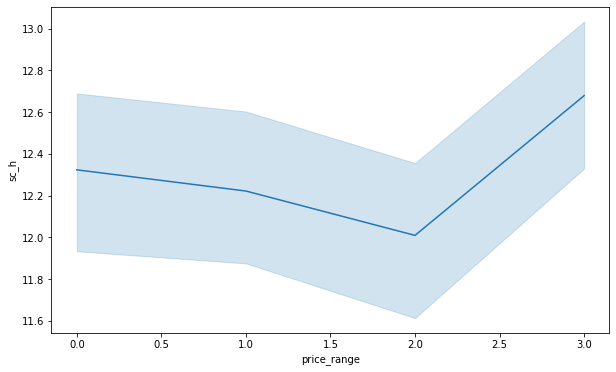

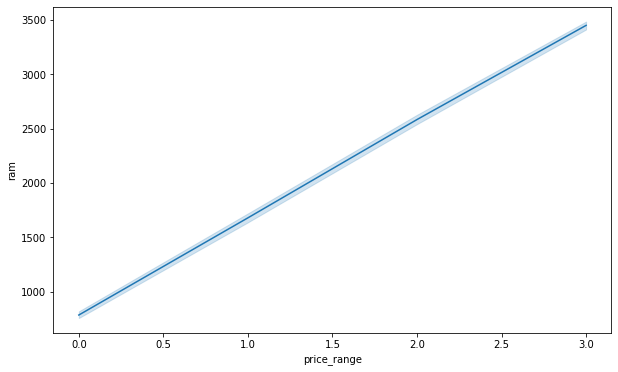

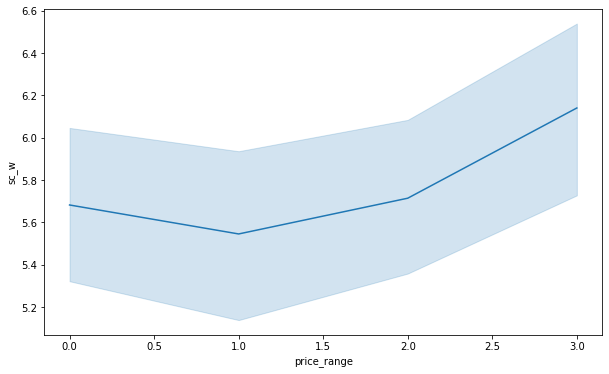

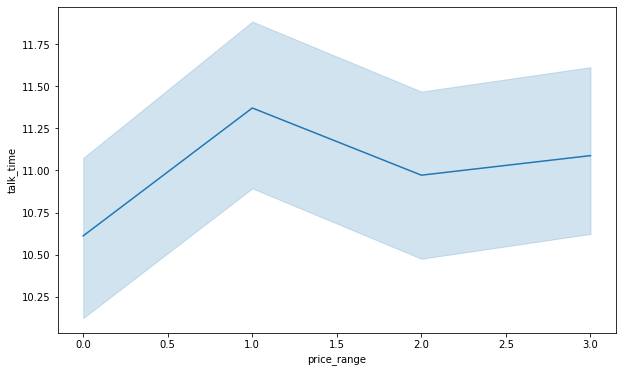

In [ ]:
list_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
# plotting boXplot and distribution
counter=1
for var in list_1:
    plt.figure(figsize=(10,6))
    
    sns.lineplot(x=df['price_range'],y=df[var])


### **Observations**
* ***For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.***
* ***Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.***
* ***Mobiles having max screen  height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases***
***RAM has clear relationship with price range we saw that in correlation matrix also.***

##**Correlation**

Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables.Correlation coefficient has a value that must fall between -1.0 and +1.0.

The closer correlation coefficient is to zero, the weaker the linear relationship.

Positive correlation coefficient values indicate a positive correlation, where the values of both variables tend to increase together.
Negative correlation coefficient values indicate a negative correlation, where the values of one variable tend to increase when the values of the other variable decrease.

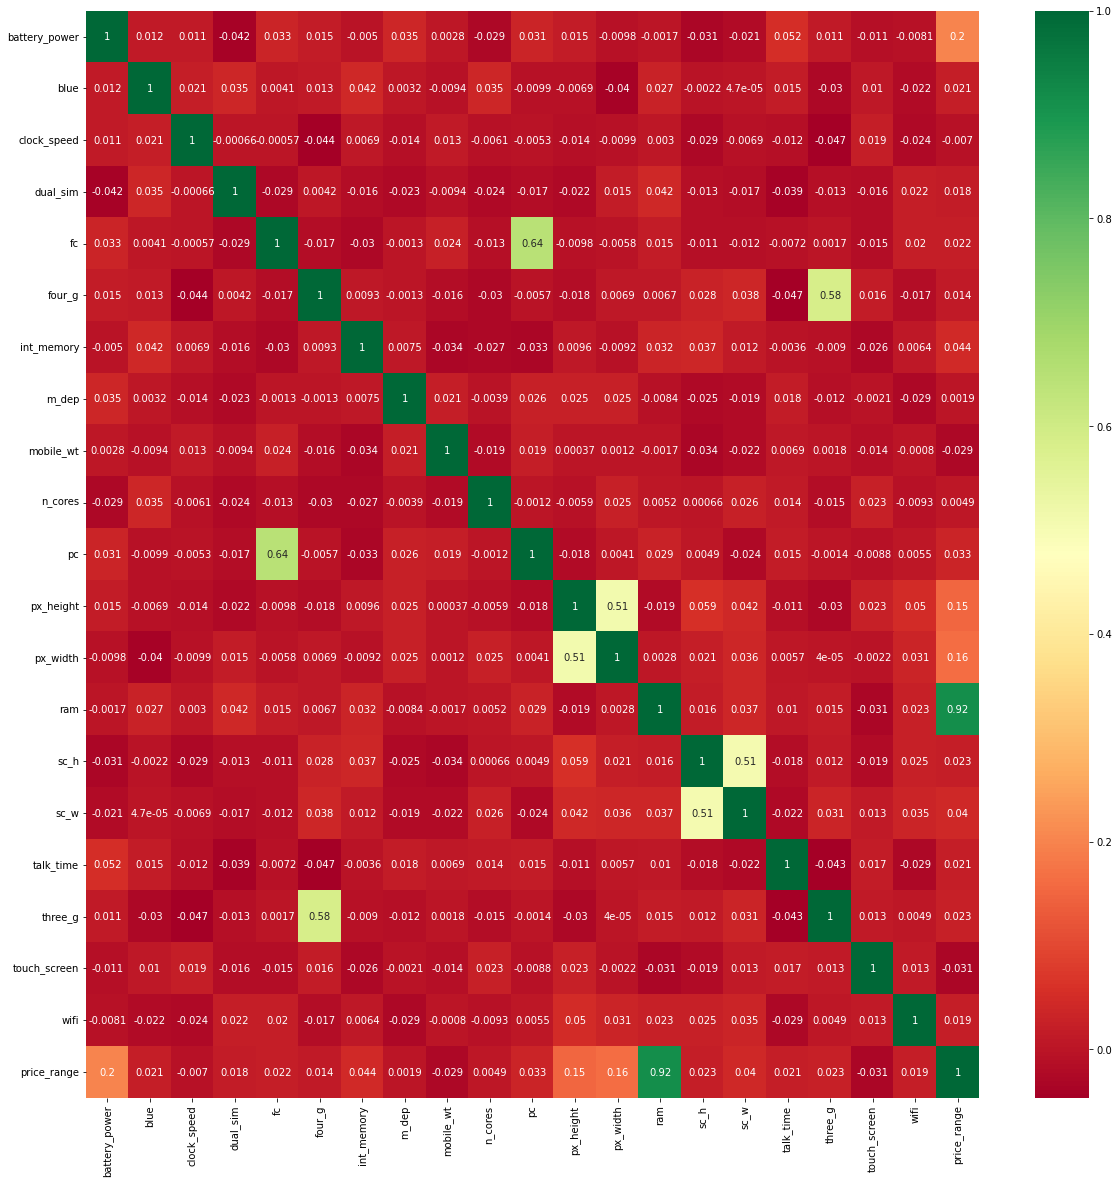

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

## **Let's Check the distribution of numerical columns and Outliers.**

In [ ]:
# numeric col list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


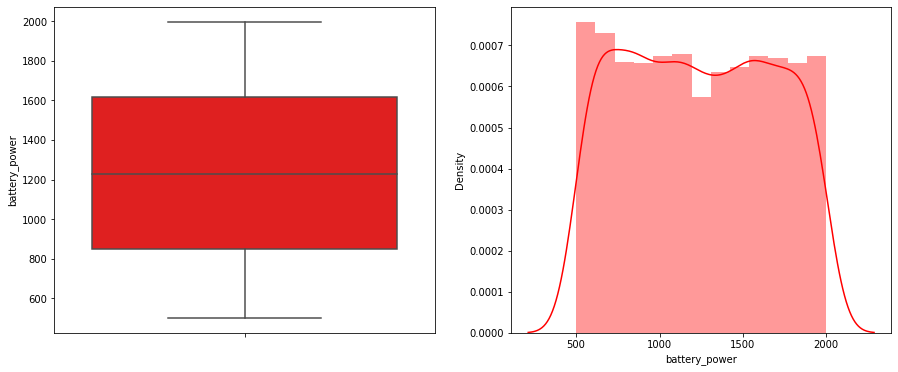

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


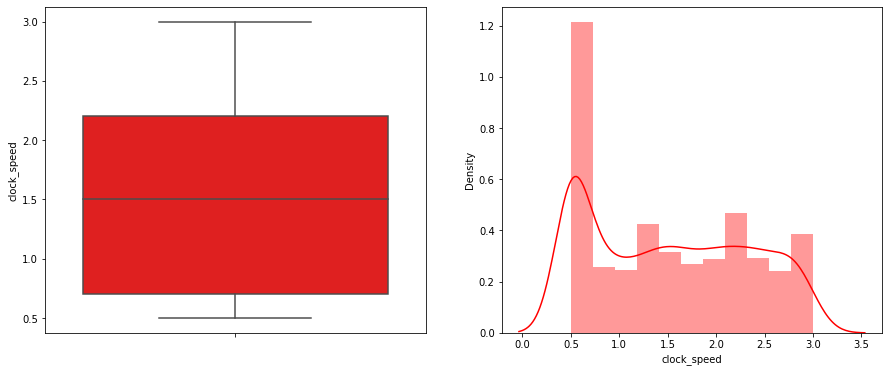

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


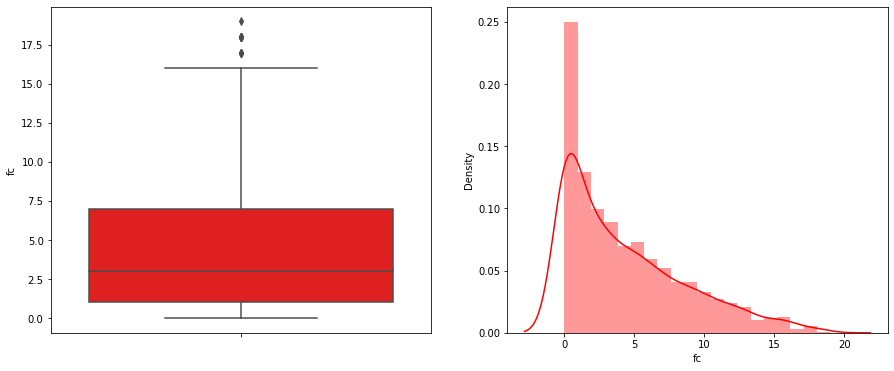

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


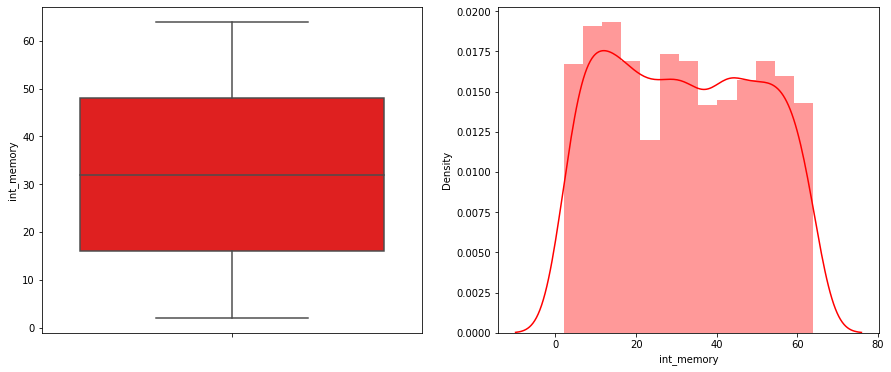

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


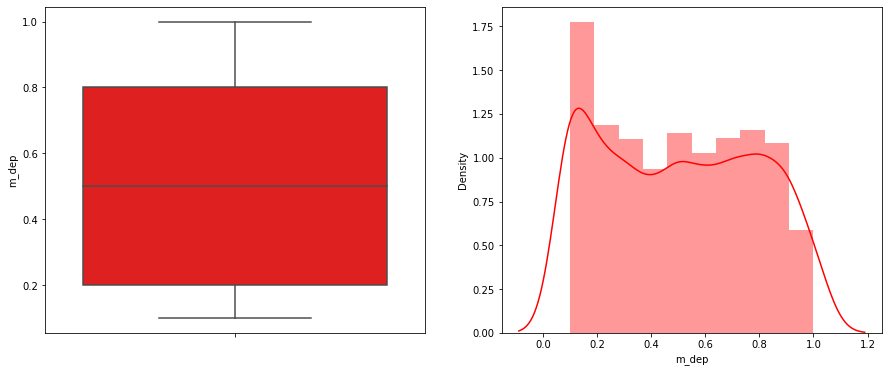

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


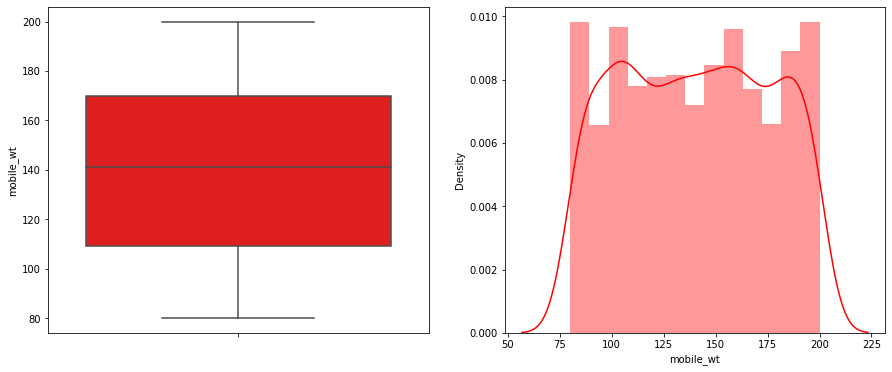

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


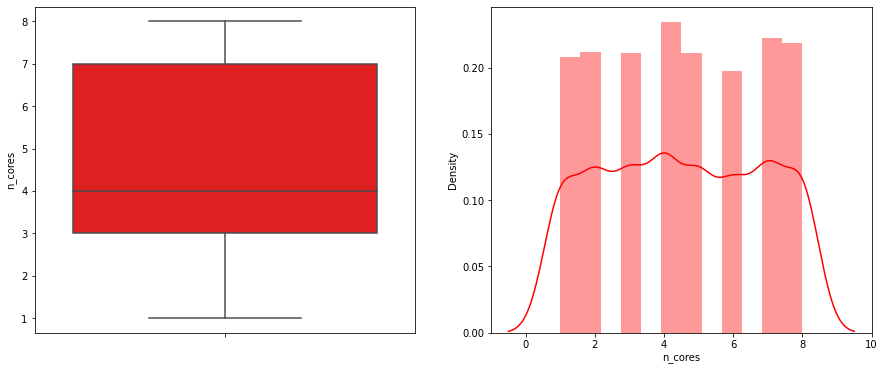

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


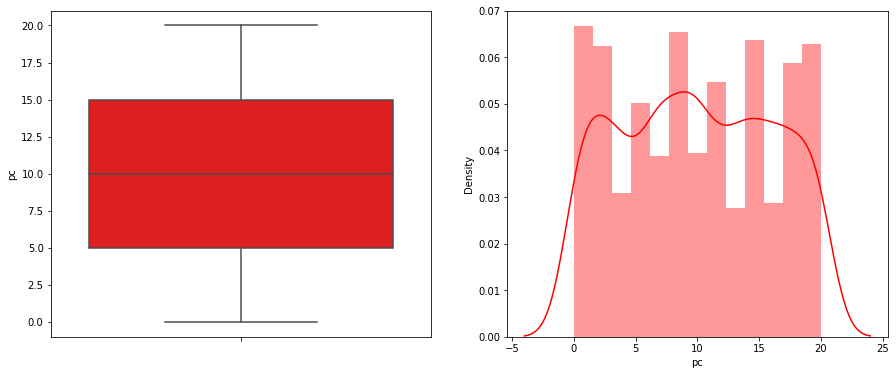

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


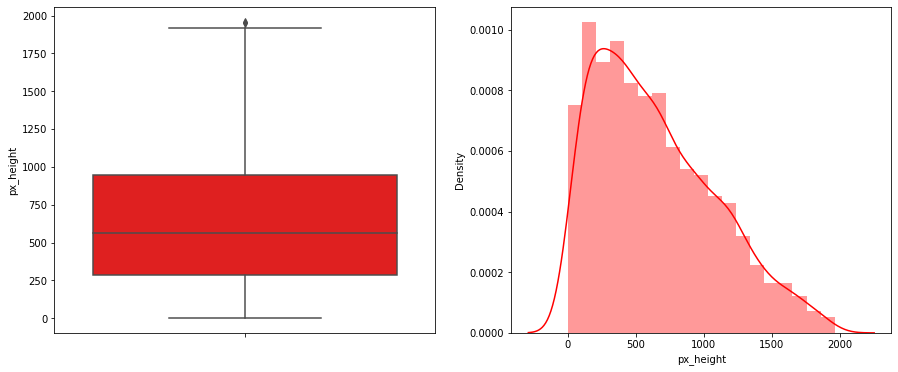

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


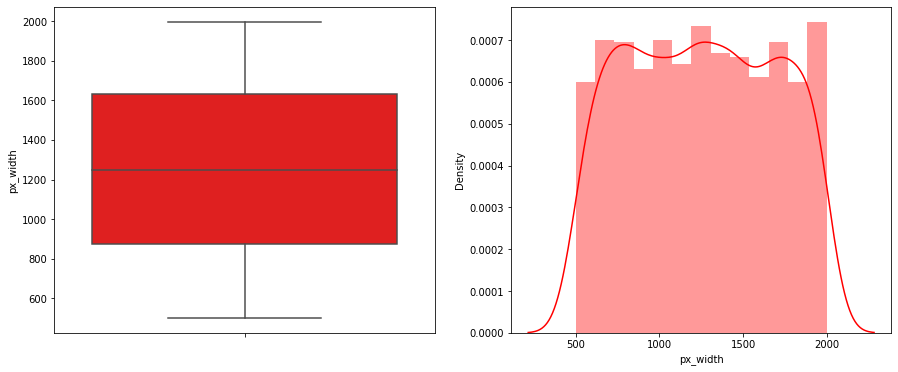

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


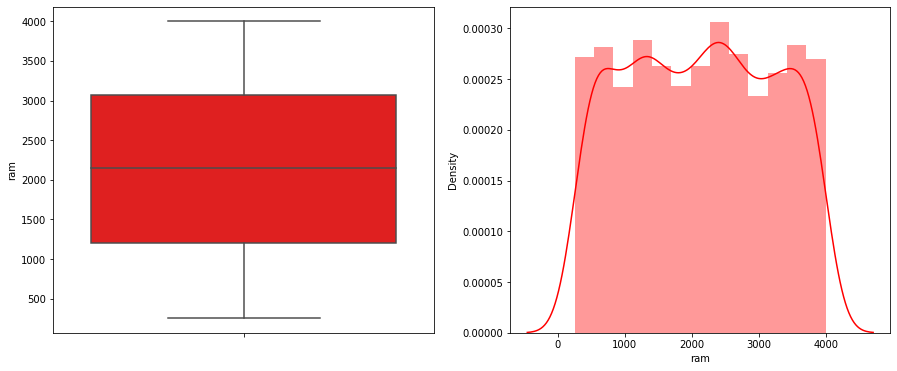

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


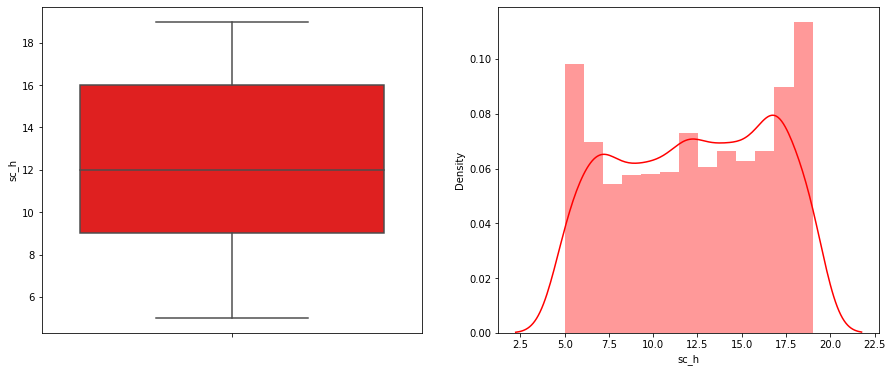

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


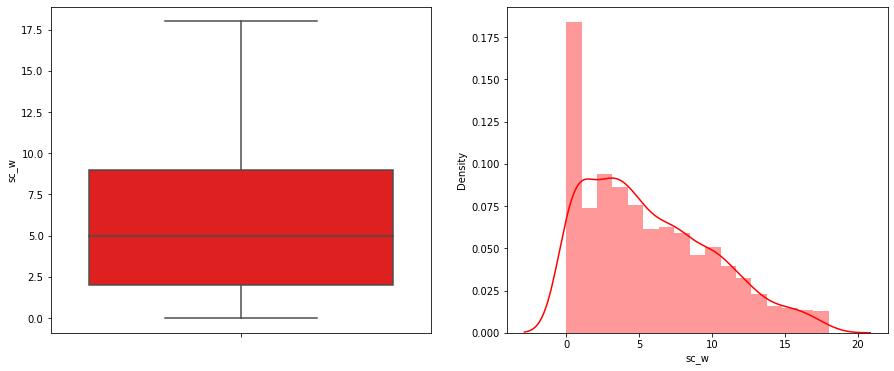

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


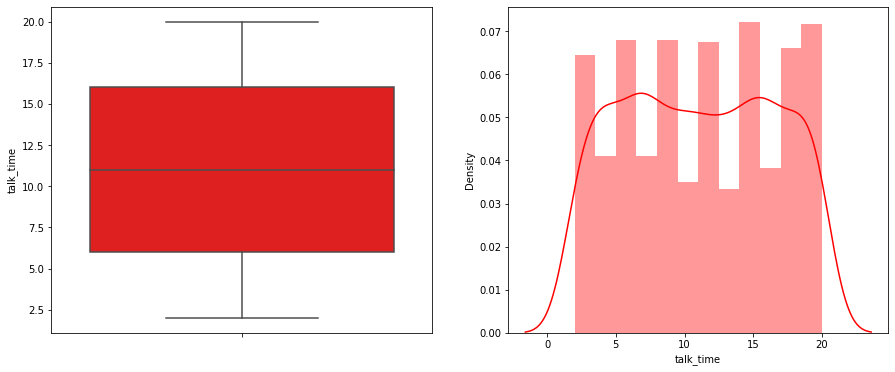

In [ ]:
# plotting boXplot and distribution
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='red')
    
    fig.set_xlabel(var)

    plt.show()

* **Data is well distrubted.**
* **fc and px_height has some outliers.**

# **Outlier Treatment.**

In [ ]:
Q1 = df["fc"].quantile(0.25)
Q3 = df['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['fc'] <= Q3)]

In [ ]:
Q1 = df["px_height"].quantile(0.25)
Q3 = df['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['px_height'] <= Q3)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


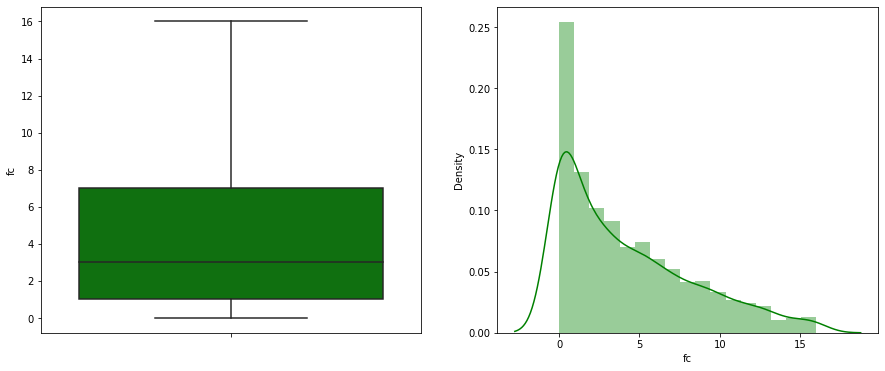

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


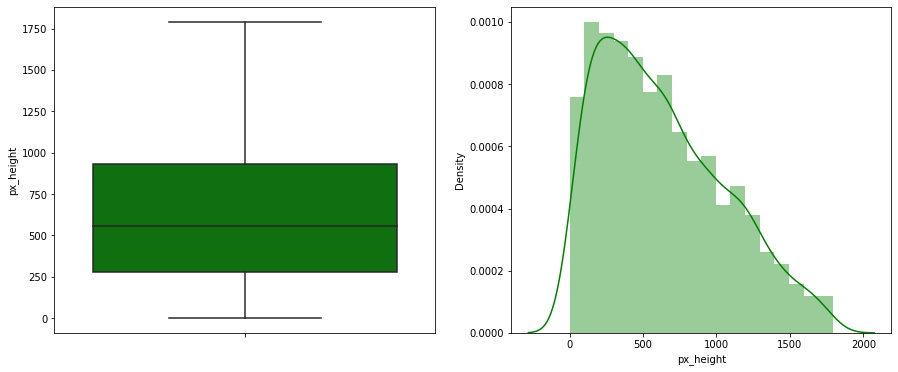

In [ ]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='green')
    
    fig.set_xlabel(var)

    plt.show()

**Thus we can see in box plot no oultiers are present**

# **Data preparing**

In [ ]:
X  = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 1962, dtype: int64

## **Selecting Important Features**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#No we Will select the  top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)


In [ ]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
# Check dataframe
featureScores

,Specs,Score
0,battery_power,13276.863289
1,blue,0.625168
2,clock_speed,0.830213
3,dual_sim,0.736762
4,fc,10.867193
5,four_g,1.319605
6,int_memory,78.357703
7,m_dep,0.797351
8,mobile_wt,87.027556
9,n_cores,8.395937


**Ram has the highest feature score and 3g has the lowest feature score**

In [ ]:
# 12 features with highest chi squared statistic 
print(featureScores.nlargest(12,'Score'))

            Specs          Score
13            ram  914971.362532
11      px_height   15629.508974
0   battery_power   13276.863289
12       px_width    9172.791036
8       mobile_wt      87.027556
6      int_memory      78.357703
15           sc_w      19.121730
14           sc_h      11.815783
16      talk_time      11.460771
4              fc      10.867193
9         n_cores       8.395937
10             pc       7.639203


In [ ]:
# 12 features with highest chi squared statistic are selected as independent variables.
X=df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc']]

# dependent varaible
y=df['price_range']


## **Splitting data into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

## **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(1569, 12)

In [ ]:
X_test.shape

(393, 12)



# Predictive Modeling:
Algorithms used for predictive modeling:
* 1) Decision Tree
* 2) Random Forest classifier
* 3) Gradient Boosting Classifier
* 4) K-nearest Neighbour classifier
* 5) XG Boost Classifier 
* 6) Support Vector Machine(SVM)


* 7)  Logistic regression




In [ ]:
# importing all essential libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial',solver = 'sag') # (sag = Stochastic Average Gradient)
lr.fit(X_train, y_train)

# Predict the test set
y_pred = lr.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[103   0   0   0]
 [  2  88   2   0]
 [  0   4  97   0]
 [  0   0   0  97]]
0.9796437659033079


In [ ]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = lr,X = X_train, y = y_train)
print('accuracy of validation set :', cvs.mean())
print('accuracy of the training set :', lr.score(X_train,y_train))
print('accuracy of the testset :', lr.score(X_test, y_test))

accuracy of validation set : 0.9592112492623268
accuracy of the training set : 0.9732313575525813
accuracy of the testset : 0.9796437659033079


## **DecisonTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,y_train)

# Predict the test set
y_pred = dt.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[93 10  0  0]
 [ 8 75  9  0]
 [ 0 12 75 14]
 [ 0  0 12 85]]
0.8346055979643766


In [ ]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = dt,X = X_train, y = y_train)
print('accuracy of validation set :', cvs.mean())
print('accuracy of the training set :', dt.score(X_train,y_train))
print('accuracy of the testset :', dt.score(X_test, y_test))

accuracy of validation set : 0.8585112228078386
accuracy of the training set : 1.0
accuracy of the testset : 0.8346055979643766


In [ ]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [ ]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [ ]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc_,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.315 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.299 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.318 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.274 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.310 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.277 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.245 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=0)

In [ ]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [ ]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9662205226258763

In [ ]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.8498727735368957

In [ ]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[95,  8,  0,  0],
       [11, 73,  8,  0],
       [ 0, 13, 79,  9],
       [ 0,  0, 10, 87]])

In [ ]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       391
           1       0.96      0.95      0.95       399
           2       0.96      0.96      0.96       390
           3       0.99      0.97      0.98       389

    accuracy                           0.97      1569
   macro avg       0.97      0.97      0.97      1569
weighted avg       0.97      0.97      0.97      1569



In [ ]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       103
           1       0.78      0.79      0.78        92
           2       0.81      0.78      0.80       101
           3       0.91      0.90      0.90        97

    accuracy                           0.85       393
   macro avg       0.85      0.85      0.85       393
weighted avg       0.85      0.85      0.85       393



In [ ]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

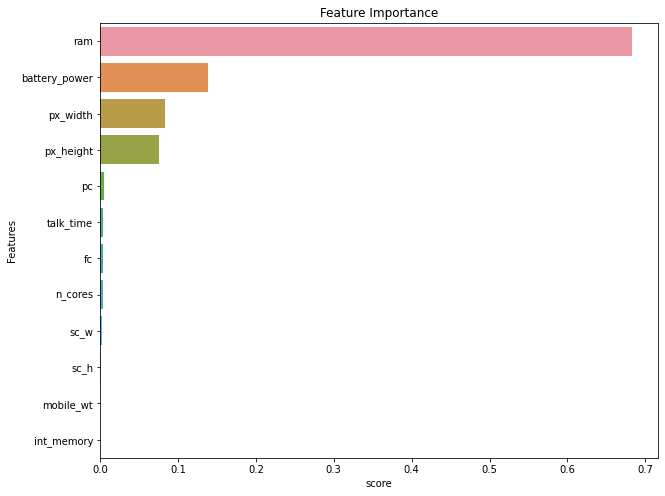

In [ ]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

In [ ]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300); 

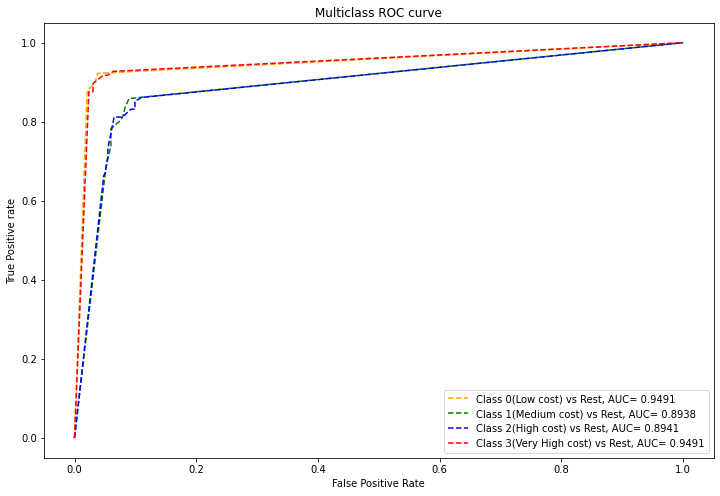

In [ ]:
# Plot AUC ROC curve.
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

* ***Train set accuracy is 100% and test accuracy is 83.***
* ***Model is overfitted on train set and did not generalised well.***
* ***We will tune hyperparamters to reduce overfitting and try to imporve the model performance.***

### **Decision Tree Classifier-Observations:**
* ***Train accuarcy has been reduced to 96% from 100% and test accuarcy is increased by 1% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.***

* ***RAM,battery power,px_height and width came out to be the most important featrures***
* ***This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.94 for both classes,whereas for class 1 and class 2 it is 0.84.***

## **RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

# Predict the test set
y_pred = rf.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[98  5  0  0]
 [ 6 77  9  0]
 [ 0 11 83  7]
 [ 0  0  7 90]]
0.8854961832061069


In [ ]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = rf,X = X_train, y = y_train)
print('accuracy of validation set :', cvs.mean())
print('accuracy of the training set :', rf.score(X_train,y_train))
print('accuracy of the testset :', rf.score(X_test, y_test))

accuracy of validation set : 0.8961213650515862
accuracy of the training set : 1.0
accuracy of the testset : 0.8854961832061069


### **Let's do some Hyperparamter Tunning of the Random forest model**

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']
          
             }

In [ ]:
# creating the instance 
rfc_= RandomForestClassifier(random_state=0)

In [ ]:
# Applying GridSearchCV
rfc_tune=GridSearchCV(rfc_,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rfc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.870 total time=   1.3s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.902 total time=   1.3s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.902 total time=   1.3s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.868 total time=   1.7s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.901 total time=   1.7s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.906 to

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy', verbose=3)

In [ ]:
#Getting best paramters for the models
rfc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 6,
 'n_estimators': 500}

In [ ]:
# fitting/training the data with best parameters.
rfc_optimal=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=None,max_leaf_nodes=None,min_samples_split=6,n_estimators=700,random_state=0)
rfc_optimal.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=6,
                       n_estimators=700, random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [ ]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.9007633587786259

In [ ]:
# getting confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[98,  5,  0,  0],
       [ 6, 79,  7,  0],
       [ 0,  9, 87,  5],
       [ 0,  0,  7, 90]])

In [ ]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       391
           1       1.00      1.00      1.00       399
           2       1.00      1.00      1.00       390
           3       1.00      1.00      1.00       389

    accuracy                           1.00      1569
   macro avg       1.00      1.00      1.00      1569
weighted avg       1.00      1.00      1.00      1569



In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       103
           1       0.85      0.86      0.85        92
           2       0.86      0.86      0.86       101
           3       0.95      0.93      0.94        97

    accuracy                           0.90       393
   macro avg       0.90      0.90      0.90       393
weighted avg       0.90      0.90      0.90       393



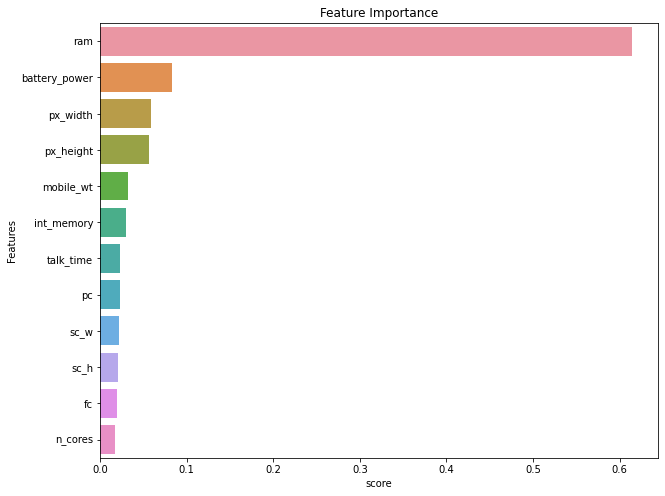

In [ ]:
#plotting feature importances
plot_feature_importance(rfc_optimal)

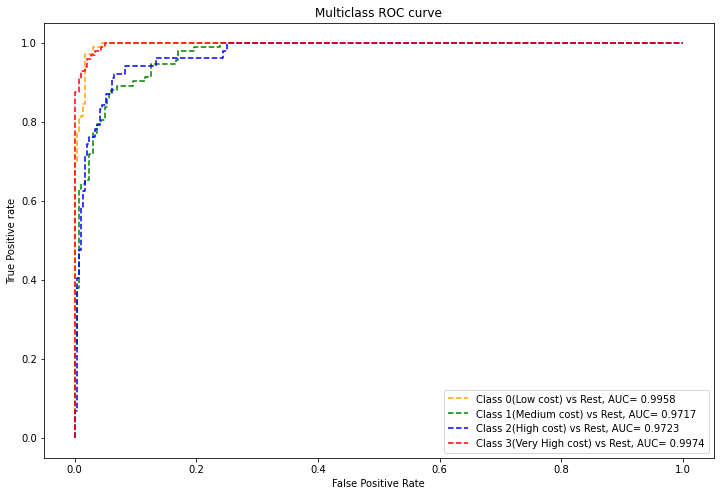

In [ ]:
# Plot AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

###**Observations of Random Forest:**
***Before Tuning***
* ***training accuarcy = 100%***
* ***test accuarcy = 88%***

***Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.***

***After tuning:***
* ***Training accuarcy= 100%***
* ***Test accuarcy = 90%***

***From roc curve its clear that model has poorly performed to classify class 1 and class 2.***

# **3)Gradient Boosting Classifier:**

In [ ]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# fittng/training the data.
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [ ]:
# checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.9134860050890585

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[98,  5,  0,  0],
       [ 4, 84,  4,  0],
       [ 0,  7, 88,  6],
       [ 0,  0,  8, 89]])

In [ ]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       103
           1       0.88      0.91      0.89        92
           2       0.88      0.87      0.88       101
           3       0.94      0.92      0.93        97

    accuracy                           0.91       393
   macro avg       0.91      0.91      0.91       393
weighted avg       0.91      0.91      0.91       393



In [ ]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [ ]:
# para_grid values to pass in gridsearchcv.
grid_values={'learning_rate':[0.005,1,2,3],
             'min_samples_split':range(10,26)
          
             }

In [ ]:
# Applying GridSearchCV
gbc_tune=GridSearchCV(gbc,param_grid=grid_values,cv=3,verbose=1,scoring='accuracy')
gbc_tune.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.005, 1, 2, 3],
                         'min_samples_split': range(10, 26)},
             scoring='accuracy', verbose=1)

In [ ]:
# Getting best parameters
gbc_tune.best_params_

{'learning_rate': 1, 'min_samples_split': 11}

In [ ]:
# getting best estimators
gbc_tune.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=11,
                           random_state=0)

In [ ]:
# aplying best estimarors
gbc_optimal=GradientBoostingClassifier(learning_rate=1,random_state=0,min_samples_split=25)
gbc_optimal.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_split=25,
                           random_state=0)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)  
y_pred=gbc_optimal.predict(X_test)

In [ ]:
# train set accuracy score
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
# test set accuracy score
accuracy_score(y_test,y_pred)

0.9007633587786259

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[102,   1,   0,   0],
       [  5,  77,  10,   0],
       [  0,  10,  86,   5],
       [  0,   0,   8,  89]])

In [ ]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       391
           1       1.00      1.00      1.00       399
           2       1.00      1.00      1.00       390
           3       1.00      1.00      1.00       389

    accuracy                           1.00      1569
   macro avg       1.00      1.00      1.00      1569
weighted avg       1.00      1.00      1.00      1569



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       103
           1       0.88      0.84      0.86        92
           2       0.83      0.85      0.84       101
           3       0.95      0.92      0.93        97

    accuracy                           0.90       393
   macro avg       0.90      0.90      0.90       393
weighted avg       0.90      0.90      0.90       393



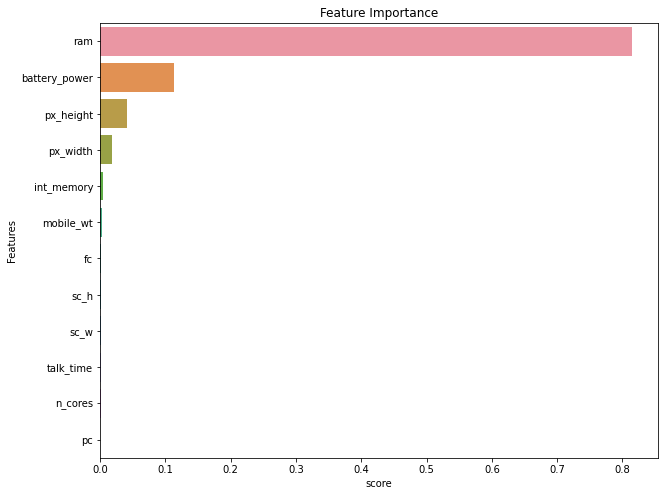

In [ ]:
#plotting feature importances
plot_feature_importance(gbc_optimal)

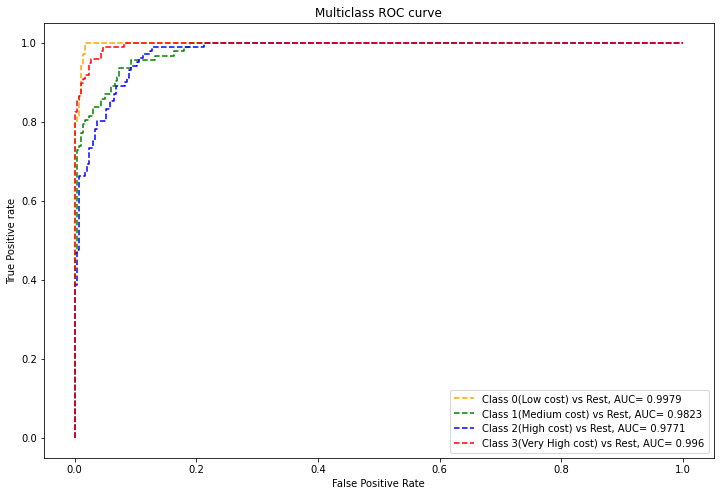

In [ ]:
# Plot AUC ROC curve.
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Observations of Gradient Boost Classifiers:**

***Before tunning:***
* ***Train accuracy score= 100%.***
* ***Test accuracy score= 91%***

***Model did not generalised well and overfitted the training data.*** ***so we tuned hyperparameters of model.***

***After Hyperparameter Tuning***
* ***Train accuracy score= 100%***
* ***Test accuarcy score=90%***

***Thus we slightly improved the model performance.However the model is not best.***





***From ROC curve it's clear that model was good to classify the class 0 and class 3.From the classification report its clear that recall for class 0 and class 3 is also good which is 96% and 90% respectively.***


# **4)K Nearest Neighbors**

In [ ]:
knn=KNeighborsClassifier()     # creating an object of the classifier
knn.fit(X_train,y_train)   #  fitting the data

KNeighborsClassifier()

In [ ]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train)
y_pred=knn.predict(X_test)

In [ ]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

0.758444869343531

In [ ]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.5979643765903307

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[79, 23,  1,  0],
       [27, 50, 15,  0],
       [ 1, 47, 41, 12],
       [ 0,  5, 27, 65]])

In [ ]:
# printing the classification report of test set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       391
           1       0.64      0.68      0.66       399
           2       0.70      0.68      0.69       390
           3       0.93      0.81      0.87       389

    accuracy                           0.76      1569
   macro avg       0.77      0.76      0.76      1569
weighted avg       0.76      0.76      0.76      1569



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       103
           1       0.40      0.54      0.46        92
           2       0.49      0.41      0.44       101
           3       0.84      0.67      0.75        97

    accuracy                           0.60       393
   macro avg       0.62      0.60      0.60       393
weighted avg       0.62      0.60      0.60       393



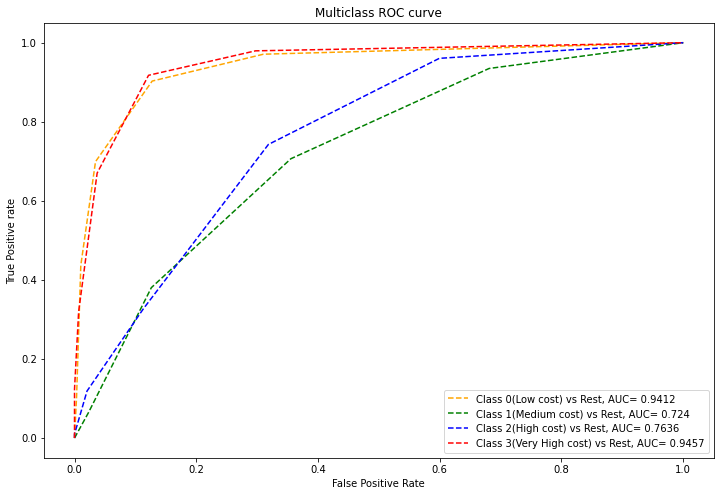

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Let's do some HyperParameter tuning.**

In [ ]:
# creating an object of classifier
knn=KNeighborsClassifier()

In [ ]:
# parameter grid values.
grid_values = {'n_neighbors':list(range(1, 31))}

In [ ]:
# applyong GridSearchCv with above grid values and cv=5
knn_tune=GridSearchCV(knn,cv=5,scoring='accuracy',verbose=3,param_grid=grid_values)
knn_tune.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.551 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.586 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.525 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.532 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.527 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.535 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.567 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.506 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.516 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.518 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.554 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [ ]:
# getting thge best parameters
knn_tune.best_params_                     # thus  best n_neighnors came out to be 30

{'n_neighbors': 30}

In [ ]:
# fitting the data with best parameters
knn_optimal=KNeighborsClassifier(n_neighbors=29)
knn_optimal.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train)
y_pred=knn_optimal.predict(X_test)

In [ ]:
#checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.758444869343531

In [ ]:
# checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.7073791348600509

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[88, 14,  1,  0],
       [19, 55, 17,  1],
       [ 3, 23, 63, 12],
       [ 0,  0, 25, 72]])

In [ ]:
# printig tye classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       391
           1       0.69      0.65      0.67       399
           2       0.66      0.70      0.68       390
           3       0.87      0.79      0.82       389

    accuracy                           0.76      1569
   macro avg       0.76      0.76      0.76      1569
weighted avg       0.76      0.76      0.76      1569



In [ ]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       103
           1       0.60      0.60      0.60        92
           2       0.59      0.62      0.61       101
           3       0.85      0.74      0.79        97

    accuracy                           0.71       393
   macro avg       0.71      0.70      0.71       393
weighted avg       0.71      0.71      0.71       393



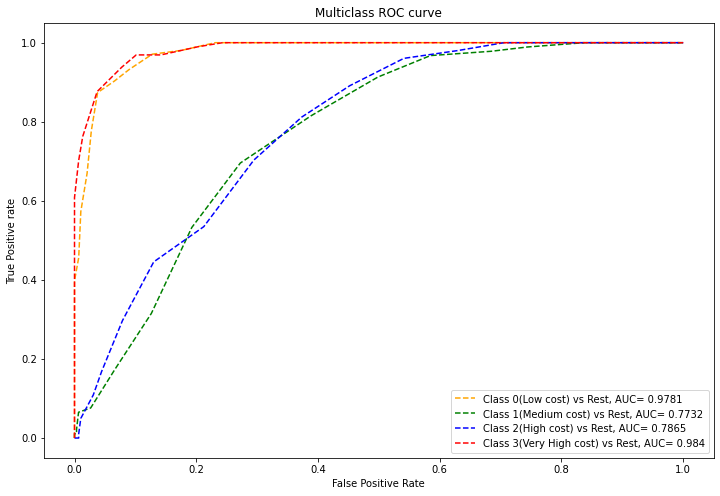

In [ ]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

### **Observations:**
***Before hyperparameters tuning:***

* ***Train Accuracy:75 %***
* ***Test Accuarcy:59 %***

***Clearly Model has performed very worst. We did hyperparameter tuning***

***After Hyperparameter Tuning:***

* ***Train Accuarcy: 75%***
* ***Test Accuarcy: 70%***

***Surely we improved the model perfromance and reduced overfitting but however this is not  good model for us.***



# **XGBooster**

In [ ]:
xgb=XGBClassifier()        # creating an object of the classifier
xgb.fit(X_train,y_train)      # fitting the data 

XGBClassifier(objective='multi:softprob')

In [ ]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [ ]:
# checking the accuracy score of train set 
accuracy_score(y_train,y_train_pred)

0.9878903760356915

In [ ]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.8931297709923665

In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[99,  4,  0,  0],
       [ 6, 77,  9,  0],
       [ 0,  9, 86,  6],
       [ 0,  0,  8, 89]])

In [ ]:
# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       391
           1       0.98      0.98      0.98       399
           2       0.98      0.98      0.98       390
           3       1.00      0.99      1.00       389

    accuracy                           0.99      1569
   macro avg       0.99      0.99      0.99      1569
weighted avg       0.99      0.99      0.99      1569



In [ ]:
# printing the classification report of the test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       103
           1       0.86      0.84      0.85        92
           2       0.83      0.85      0.84       101
           3       0.94      0.92      0.93        97

    accuracy                           0.89       393
   macro avg       0.89      0.89      0.89       393
weighted avg       0.89      0.89      0.89       393



### **Let's Do some Hyperparameter tuning:**

In [ ]:

# parameter grid values for GridSearchCv 
grid_values={
          'learning_rate':[0.6,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }

In [ ]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv 
xgb_tune = GridSearchCV(xgb, grid_values, cv=3,verbose=4)
xgb_tune.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.895 total time=   1.5s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.935 total time=   1.5s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.5;, score=0.899 total time=   1.5s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.904 total time=   1.8s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.927 total time=   2.2s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=500, subsample=0.6;, score=0.912 total time=   1.9s
[CV 1/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.899 total time=   2.8s
[CV 2/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.5;, score=0.927 total time=   2.8s
[CV 3/3] END gamma=0.2, learning_rate=0.6, n_estimators=1000, subsample=0.

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'gamma': [0.2], 'learning_rate': [0.6, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=4)

In [ ]:
xgb_tune.best_params_

{'gamma': 0.2, 'learning_rate': 0.6, 'n_estimators': 500, 'subsample': 0.6}

In [ ]:
xgb_opti=XGBClassifier(learning_rate=.6,gamma=0.2,n_estimators=1000,subsample=0.5)
xgb_opti.fit(X_train,y_train)

XGBClassifier(gamma=0.2, learning_rate=0.6, n_estimators=1000,
              objective='multi:softprob', subsample=0.5)

In [ ]:
y_train_pred=xgb_opti.predict(X_train)
y_pred=xgb_opti.predict(X_test)

In [ ]:
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
accuracy_score(y_test,y_pred)

0.9287531806615776

In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[100,   3,   0,   0],
       [  5,  82,   5,   0],
       [  0,   5,  91,   5],
       [  0,   0,   5,  92]])

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       391
           1       1.00      1.00      1.00       399
           2       1.00      1.00      1.00       390
           3       1.00      1.00      1.00       389

    accuracy                           1.00      1569
   macro avg       1.00      1.00      1.00      1569
weighted avg       1.00      1.00      1.00      1569



In [ ]:
#printing the classifiaction report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       103
           1       0.91      0.89      0.90        92
           2       0.90      0.90      0.90       101
           3       0.95      0.95      0.95        97

    accuracy                           0.93       393
   macro avg       0.93      0.93      0.93       393
weighted avg       0.93      0.93      0.93       393



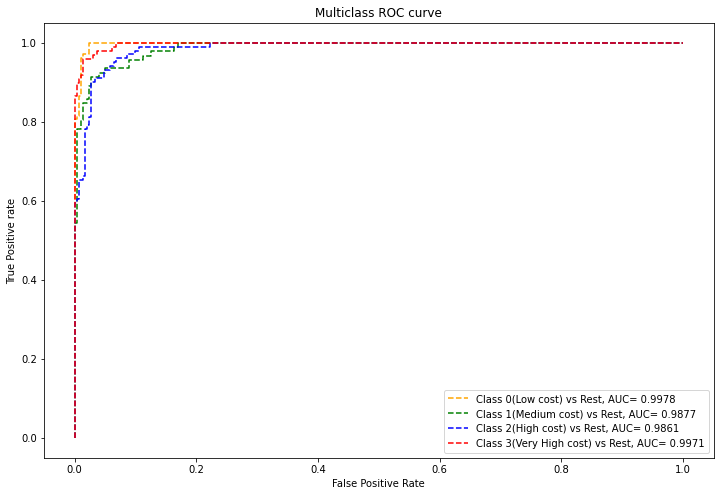

In [ ]:
# Plot AUC ROC curve.
pred_prob = xgb_opti.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

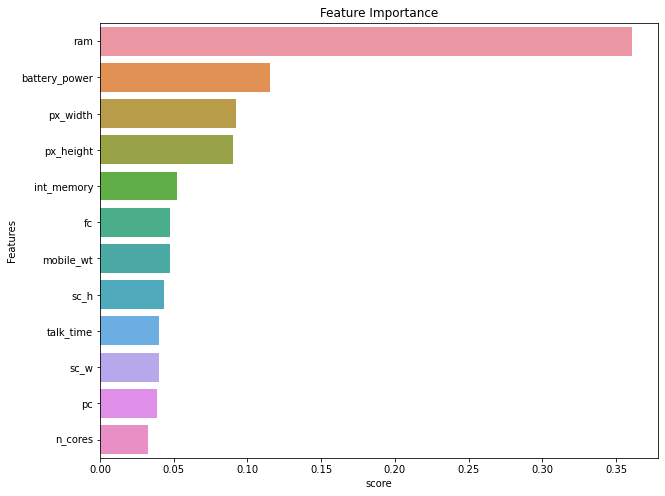

In [ ]:
#plotting feature importances
plot_feature_importance(xgb_opti)

### **Observations**

***Before hyperparameter Tuning***
* ***Train Accuarcy = 98%***
* ***Test Accuarcy = 89%***

***After hyperparameter Tuning***
* ***Train Accuarcy = 100%***
* ***Test Accuarcy = 92%***

***we have improved the model performance by Hyperparamter tuning. Test accuracy is increased to 92%.But still the difference of accuracy score between train and test is  more than 5%.We can say model is very slightly overfitted***

***From AUC-ROC curve its clear that model has almost correctly predicted the class 0 and class 3.***


## **SVM**

In [ ]:
parameters ={
'C' : [1,0.1,0.25,0.5,2,0.75],
'kernel' : ["linear","rbf"],
'gamma' : ["auto",0.01,0.001,0.0001,1],
'decision_function_shape' : ["ovo" ,"ovr"]}

In [ ]:
from sklearn.svm import SVC

svc=SVC(C=2,gamma="auto",decision_function_shape="ovo",kernel="linear",random_state=0)
svc.fit(X_train, y_train)


# Predict the test set
y_pred = svc.predict(X_test)

# evaluate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[103   0   0   0]
 [  4  86   2   0]
 [  0   4  97   0]
 [  0   0   0  97]]
0.9745547073791349


In [ ]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = svc,X = X_train, y = y_train)
print('accuracy of validation set :', cvs.mean())
print('accuracy of the training set :', svc.score(X_train,y_train))
print('accuracy of the testset :', svc.score(X_test, y_test))

accuracy of validation set : 0.959848191937486
accuracy of the training set : 0.9783301465901848
accuracy of the testset : 0.9745547073791349


### **Hyperparameter Tuning**

In [ ]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [ ]:
# creating an object for classifier
svm  = SVC ()

In [ ]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [ ]:
# getting the best parameters
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [ ]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [ ]:
# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train,y_train)   # fitting the data

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [ ]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train)    
y_pred=svm_optimal.predict(X_test)

In [ ]:
y_train_pred

array([0, 2, 0, ..., 1, 3, 2])

In [ ]:
y_pred

array([1, 2, 2, 3, 2, 1, 0, 0, 1, 1, 3, 3, 1, 1, 0, 3, 3, 0, 2, 1, 0, 0,
       1, 3, 1, 3, 0, 3, 2, 0, 1, 3, 3, 0, 0, 3, 1, 3, 0, 1, 0, 1, 2, 2,
       0, 2, 2, 2, 1, 3, 2, 1, 3, 1, 1, 0, 0, 0, 3, 2, 3, 0, 3, 3, 1, 2,
       3, 3, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1, 3, 3, 3, 2, 0, 3,
       3, 0, 3, 0, 1, 3, 3, 2, 1, 0, 1, 3, 2, 1, 0, 3, 1, 0, 1, 0, 1, 3,
       0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 3, 2, 2, 1, 3, 2,
       0, 0, 0, 3, 2, 0, 0, 1, 1, 1, 1, 3, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0,
       1, 0, 2, 0, 1, 2, 3, 3, 2, 3, 2, 3, 2, 1, 3, 0, 2, 3, 1, 0, 3, 2,
       3, 1, 2, 0, 2, 3, 3, 3, 1, 1, 0, 1, 2, 0, 1, 1, 0, 3, 2, 1, 1, 3,
       3, 3, 2, 0, 3, 2, 1, 3, 0, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 0, 0, 3, 0, 3, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 3, 2, 0, 3, 2, 1, 2, 0, 1, 0, 3, 0, 0, 3, 0, 2,
       2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 3, 1, 2, 1, 0, 2, 2, 1, 0, 0,
       3, 0, 3, 2, 1, 2, 0, 3, 2, 2, 3, 2, 2, 2, 3,

In [ ]:
# checkig the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.982791586998088

In [ ]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

0.9745547073791349

In [ ]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[103,   0,   0,   0],
       [  2,  87,   3,   0],
       [  0,   4,  96,   1],
       [  0,   0,   0,  97]])

In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       391
           1       0.98      0.98      0.98       399
           2       0.97      0.97      0.97       390
           3       0.98      0.99      0.99       389

    accuracy                           0.98      1569
   macro avg       0.98      0.98      0.98      1569
weighted avg       0.98      0.98      0.98      1569



In [ ]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       103
           1       0.96      0.95      0.95        92
           2       0.97      0.95      0.96       101
           3       0.99      1.00      0.99        97

    accuracy                           0.97       393
   macro avg       0.97      0.97      0.97       393
weighted avg       0.97      0.97      0.97       393



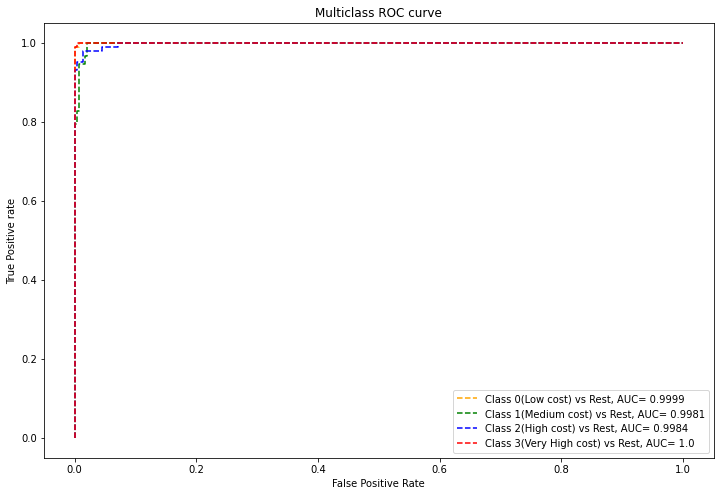

In [ ]:
# Plot AUC ROC curve.
pred_prob = svm_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

# **Conclusion**

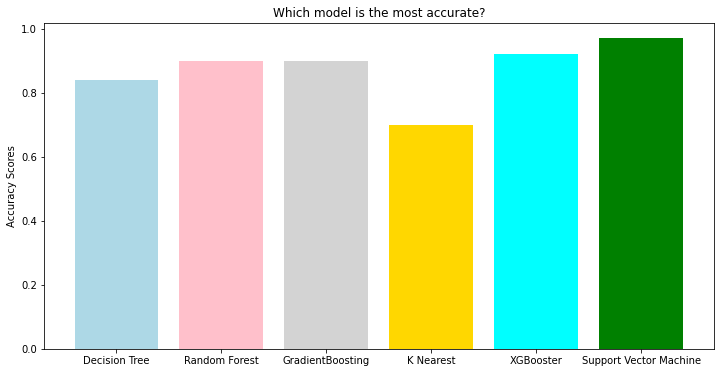

In [ ]:
plt.figure(figsize = (12,6))
label = ['Decision Tree','Random Forest','GradientBoosting','K Nearest','XGBooster', 'Support Vector Machine']
acc_score = [0.84,0.90,0.90,0.70,0.92,0.97]

plt.bar(label,acc_score, color=['lightblue', 'pink', 'lightgrey','gold', 'cyan','green'])
plt.title('Which model is the most accurate?')
plt.xlabel('')
plt.ylabel('Accuracy Scores')
plt.show()

**AS we can see SVM  algorithm has highest accuracy which is 97%**

## **Price Range for sample**

In [ ]:
sc = StandardScaler()
test_df1 = sc.fit_transform(X_test)

In [ ]:
predicted_price_range = svc.predict(X_test) 

In [ ]:
predicted_price_range

array([1, 2, 2, 3, 2, 1, 0, 0, 1, 1, 3, 3, 1, 1, 0, 3, 3, 0, 2, 1, 0, 0,
       1, 3, 1, 3, 0, 3, 2, 0, 1, 3, 3, 0, 0, 3, 1, 3, 0, 1, 0, 1, 2, 2,
       0, 2, 2, 2, 1, 3, 2, 1, 3, 1, 1, 0, 0, 0, 3, 2, 3, 0, 3, 3, 1, 2,
       3, 3, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1, 3, 3, 3, 2, 0, 3,
       3, 0, 3, 0, 1, 3, 3, 2, 1, 0, 1, 3, 2, 1, 0, 3, 1, 0, 1, 0, 1, 3,
       0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 3, 2, 2, 1, 3, 2,
       0, 0, 0, 3, 1, 0, 0, 1, 1, 1, 1, 3, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0,
       1, 0, 2, 0, 1, 2, 3, 3, 2, 3, 2, 3, 2, 1, 3, 0, 2, 3, 1, 0, 3, 2,
       3, 1, 2, 0, 2, 3, 3, 3, 0, 1, 0, 1, 2, 0, 1, 1, 0, 3, 2, 1, 1, 3,
       3, 3, 2, 0, 3, 2, 1, 3, 0, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 0, 0, 3, 0, 3, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 3, 2, 0, 3, 2, 1, 2, 0, 1, 0, 3, 0, 0, 2, 0, 2,
       2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 3, 1, 2, 1, 0, 2, 2, 1, 0, 0,
       3, 0, 3, 2, 1, 2, 0, 3, 2, 2, 3, 2, 2, 2, 3,


*   **SVM performed very well as compared to other alogorithms.**
*   **In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.**
*   **f1 score for individual classes is also very good. Area under curve for each class prediction is also almost 1.**




